In [4]:
import numpy as np 
import matplotlib.pyplot as plt

In [5]:


def initialize_random_maze(grid_size, wall_prob=0.1, green_prob=0.02, brown_prob=0.02, reward_green=1, reward_brown=-1, reward_white=-0.04):
    """
    Initializes a maze environment of a given size with randomly placed walls, green squares, and brown squares.
    
    Parameters:
    - grid_size: Tuple[int, int], size of the grid (rows, columns).
    - wall_prob: Probability of a cell being a wall.
    - green_prob: Probability of a cell being a green square.
    - brown_prob: Probability of a cell being a brown square.
    - reward_green: Reward for green squares.
    - reward_brown: Negative reward for brown squares.
    - reward_white: Default reward for empty squares.
    
    Returns:
    - rewards: Numpy array of rewards for each cell in the grid.
    - utilities: Numpy array initialized to zeros for utilities.
    - policy: Numpy array for initial policy with placeholders.
    """
    np.random.seed(0)  # For reproducibility, you can remove or change the seed value
    
    # Initialize rewards with the default white reward
    rewards = np.full(grid_size, reward_white)
    
    # Randomly allocate walls, green squares, and brown squares
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            rand_num = np.random.random()  # Generate a random number between 0 and 1
            if rand_num < wall_prob:
                # Cell is a wall (no reward)
                continue
            elif rand_num < wall_prob + green_prob:
                # Cell is a green square
                rewards[i, j] = reward_green
            elif rand_num < wall_prob + green_prob + brown_prob:
                # Cell is a brown square
                rewards[i, j] = reward_brown
    
    # Initialize utilities to zero and policy to a placeholder
    utilities = np.zeros(grid_size)
    policy = np.full(grid_size, ' ', dtype='<U5')
    
    return rewards, utilities, policy





6X6 maze

In [9]:
# Example usage for a 6X6 maze
grid_size = (6, 6)
rewards, utilities, policy = initialize_random_maze(grid_size)

prob_forward = 0.8
prob_side = 0.1
actions = ['up', 'down', 'left', 'right']
# Discount factor remains the same
gamma = 0.99

def is_valid_state(x, y):
    return (0 <= x < grid_size[0]) and (0 <= y < grid_size[1])



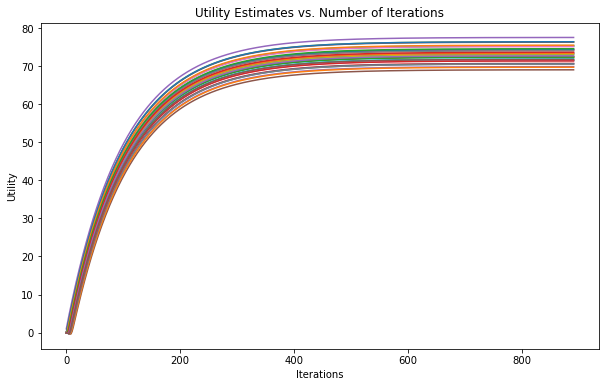

Number of iterations before it converges: 891

Optimal Policy:
[['down' 'down' 'left' 'left' 'left' 'left']
 ['down' 'down' 'down' 'left' 'left' 'down']
 ['down' 'down' 'left' 'left' 'left' 'down']
 ['down' 'left' 'left' 'left' 'left' 'left']
 ['left' 'left' 'left' 'left' 'left' 'left']
 ['up' 'left' 'left' 'left' 'left' 'left']]

Utilities of states:
[['73.11' '72.39' '71.55' '70.70' '69.86' '69.02']
 ['74.18' '73.37' '72.43' '71.49' '70.57' '69.71']
 ['75.27' '74.37' '73.39' '72.42' '71.47' '70.53']
 ['76.38' '75.37' '74.35' '73.35' '72.35' '71.36']
 ['77.52' '76.29' '75.13' '74.01' '72.94' '71.89']
 ['76.39' '75.49' '74.57' '73.63' '72.70' '71.76']]


In [10]:
# using same value iteration code as done in part 1


# Calculate expected utility of performing an action from a state
def expected_utility(action, x, y):
    if action == 'up':
        forward = (x - 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'down':
        forward = (x + 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'left':
        forward = (x, y - 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)
    elif action == 'right':
        forward = (x, y + 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)

    utility_sum = 0
    for nx, ny in [forward, side1, side2]:
        if is_valid_state(nx, ny):
            p = prob_forward if (nx, ny) == forward else prob_side
            utility_sum += p * utilities[nx, ny]
        else:
            utility_sum += (prob_forward if (nx, ny) == forward else prob_side) * utilities[x, y]
    return utility_sum

# value iteration

iteration = 0
utilities_history = []  # Track utilities for plotting
while True:
    delta = 0
    new_utilities = np.copy(utilities)
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if is_valid_state(x, y):
                max_utility = -np.inf
                for action in actions:
                    utility = rewards[x, y] + gamma * expected_utility(action, x, y)
                    if utility > max_utility:
                        max_utility = utility
                        policy[x, y] = action
                delta = max(delta, abs(max_utility - utilities[x, y]))
                new_utilities[x, y] = max_utility
    utilities = new_utilities
    utilities_history.append(utilities.copy())
    iteration += 1
    if delta < 0.01 * (1 - gamma) / gamma:  # Convergence criterion
        break

# Plotting utilities as a function of iterations
plt.figure(figsize=(10, 6))
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if is_valid_state(x, y):
            utilities_xy = [utilities_history[i][x, y] for i in range(len(utilities_history))]
            plt.plot(utilities_xy, label=f'State ({x}, {y})')

plt.xlabel('Iterations')
plt.ylabel('Utility')
plt.title('Utility Estimates vs. Number of Iterations')
plt.show()

# Define the policy_readable and utilities_readable (unchanged)
policy_readable = np.full(grid_size, 'Wall')
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        
        if is_valid_state(x, y):
            policy_readable[x, y] = policy[x, y]
        else:
            policy_readable[x, y] = 'Wall'

policy_readable

utilities_readable = np.full(grid_size, ' ', dtype='<U10')

# Populate the utilities_readable with the values from the utilities array
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        
        if is_valid_state(x, y):
            utilities_readable[x, y] = f"{utilities[x, y]:.2f}"
        
        else:
            utilities_readable[x, y] = 'Wall'
      
# Display results
print("Number of iterations before it converges:", iteration)
print()
print("Optimal Policy:")
print(policy_readable)
print()
print("Utilities of states:")
print(utilities_readable)

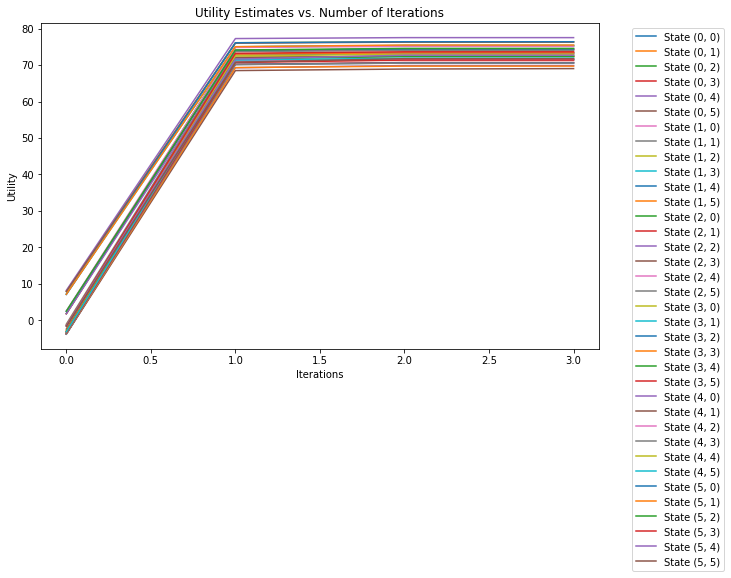

Number of iterations before convergence: 4

Optimal Policy:
[['down' 'down' 'left' 'left' 'left' 'left']
 ['down' 'down' 'down' 'left' 'left' 'down']
 ['down' 'down' 'left' 'left' 'left' 'down']
 ['down' 'left' 'left' 'left' 'left' 'left']
 ['left' 'left' 'left' 'left' 'left' 'left']
 ['up' 'left' 'left' 'left' 'left' 'left']]

Utilities of states:
[['73.12' '72.39' '71.55' '70.71' '69.86' '69.03']
 ['74.18' '73.37' '72.43' '71.49' '70.57' '69.71']
 ['75.27' '74.37' '73.39' '72.43' '71.47' '70.53']
 ['76.38' '75.37' '74.36' '73.35' '72.35' '71.36']
 ['77.52' '76.29' '75.13' '74.01' '72.94' '71.89']
 ['76.39' '75.49' '74.57' '73.63' '72.70' '71.76']]


In [12]:

# Calculate expected utility of performing an action from a state
def expected_utility(action, x, y, utilities):
    if action == 'up':
        forward = (x - 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'down':
        forward = (x + 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'left':
        forward = (x, y - 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)
    elif action == 'right':
        forward = (x, y + 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)

    
    utility_sum = 0
    for nx, ny in [forward, side1, side2]:
        if is_valid_state(nx, ny):
            p = prob_forward if (nx, ny) == forward else prob_side
            utility_sum += p * utilities[nx, ny]
        else:
            utility_sum += (prob_forward if (nx, ny) == forward else prob_side) * utilities[x, y]
    return utility_sum

initial_policy = np.random.choice(actions, size=grid_size)


# Correct the policy_evaluation function to pass the utilities array
def policy_evaluation(policy, utilities):
    while True:
        delta = 0
        new_utilities = utilities.copy()
        for x in range(grid_size[0]):
            for y in range(grid_size[1]):
                if not is_valid_state(x, y):
                    continue
                utility = rewards[x, y] + gamma * expected_utility(policy[x, y], x, y, utilities)
                delta = max(delta, abs(utility - utilities[x, y]))
                new_utilities[x, y] = utility
        if delta < 0.01*(1-gamma)/gamma:
            break
        utilities = new_utilities
    return utilities

# Correct the policy_improvement function to pass the utilities array
def policy_improvement(utilities, policy):
    policy_stable = True
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if not is_valid_state(x, y):
                continue
            old_action = policy[x, y]
            max_utility = -np.inf
            for action in actions:
                utility = rewards[x, y] + gamma * expected_utility(action, x, y, utilities)
                if utility > max_utility:
                    max_utility = utility
                    policy[x, y] = action
            if old_action != policy[x, y]:
                policy_stable = False
    return policy, policy_stable

# Run the policy iteration code with the corrected functions
utilities = np.zeros(grid_size)
policy = initial_policy.copy()
utilities_history = []  # Track utilities for plotting
iteration = 0

while True:
    utilities = policy_evaluation(policy, utilities)
    utilities_history.append(utilities.copy())
    policy, policy_stable = policy_improvement(utilities, policy)
    iteration += 1
    if policy_stable:
        break

# Create readable policy and utilities output
policy_readable = np.full(grid_size, 'Wall')
utilities_readable = np.full(grid_size, 'Wall', dtype='<U10')
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if is_valid_state(x, y):
            policy_readable[x, y] = policy[x, y]
            utilities_readable[x, y] = f"{utilities[x, y]:.2f}"

# Plotting utilities as a function of iterations
plt.figure(figsize=(10, 6))
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if is_valid_state(x, y):
            utilities_xy = [utilities_history[i][x, y] for i in range(len(utilities_history))]
            plt.plot(utilities_xy, label=f'State ({x}, {y})')

plt.xlabel('Iterations')
plt.ylabel('Utility')
plt.title('Utility Estimates vs. Number of Iterations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display results
print("Number of iterations before convergence:", iteration)
print()
print("Optimal Policy:")
print(policy_readable)
print()
print("Utilities of states:")
print(utilities_readable)

30X30 maze

In [13]:
# Example usage for a 30X30 maze
grid_size = (30, 30)
rewards, utilities, policy = initialize_random_maze(grid_size)

prob_forward = 0.8
prob_side = 0.1
actions = ['up', 'down', 'left', 'right']
# Discount factor remains the same
gamma = 0.99

def is_valid_state(x, y):
    return (0 <= x < grid_size[0]) and (0 <= y < grid_size[1])


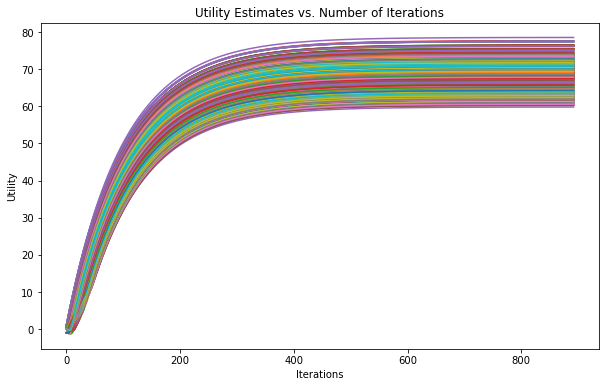

Number of iterations before it converges: 893

Optimal Policy:
[['down' 'down' 'down' 'left' 'left' 'righ' 'righ' 'righ' 'righ' 'righ'
  'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ'
  'righ' 'righ' 'righ' 'righ' 'up' 'left' 'left' 'left' 'left' 'left']
 ['down' 'down' 'left' 'left' 'left' 'righ' 'righ' 'righ' 'righ' 'righ'
  'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ'
  'righ' 'righ' 'righ' 'up' 'up' 'left' 'left' 'left' 'left' 'left']
 ['righ' 'down' 'left' 'left' 'down' 'down' 'righ' 'righ' 'righ' 'righ'
  'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ'
  'righ' 'righ' 'up' 'up' 'up' 'up' 'left' 'left' 'left' 'left']
 ['down' 'down' 'down' 'down' 'down' 'down' 'down' 'righ' 'righ' 'righ'
  'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'up'
  'up' 'up' 'up' 'up' 'up' 'up' 'left' 'left' 'left' 'left']
 ['down' 'down' 'down' 'down' 'left' 'down' 'down' 'down' 'righ' 'righ'
  'righ' 'up' 'righ' 'rig

In [14]:
# using same value iteration code as done in part 1


# Calculate expected utility of performing an action from a state
def expected_utility(action, x, y):
    if action == 'up':
        forward = (x - 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'down':
        forward = (x + 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'left':
        forward = (x, y - 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)
    elif action == 'right':
        forward = (x, y + 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)

    utility_sum = 0
    for nx, ny in [forward, side1, side2]:
        if is_valid_state(nx, ny):
            p = prob_forward if (nx, ny) == forward else prob_side
            utility_sum += p * utilities[nx, ny]
        else:
            utility_sum += (prob_forward if (nx, ny) == forward else prob_side) * utilities[x, y]
    return utility_sum

# value iteration

iteration = 0
utilities_history = []  # Track utilities for plotting
while True:
    delta = 0
    new_utilities = np.copy(utilities)
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if is_valid_state(x, y):
                max_utility = -np.inf
                for action in actions:
                    utility = rewards[x, y] + gamma * expected_utility(action, x, y)
                    if utility > max_utility:
                        max_utility = utility
                        policy[x, y] = action
                delta = max(delta, abs(max_utility - utilities[x, y]))
                new_utilities[x, y] = max_utility
    utilities = new_utilities
    utilities_history.append(utilities.copy())
    iteration += 1
    if delta < 0.01 * (1 - gamma) / gamma:  # Convergence criterion
        break

# Plotting utilities as a function of iterations
plt.figure(figsize=(10, 6))
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if is_valid_state(x, y):
            utilities_xy = [utilities_history[i][x, y] for i in range(len(utilities_history))]
            plt.plot(utilities_xy, label=f'State ({x}, {y})')

plt.xlabel('Iterations')
plt.ylabel('Utility')
plt.title('Utility Estimates vs. Number of Iterations')
plt.show()

# Define the policy_readable and utilities_readable (unchanged)
policy_readable = np.full(grid_size, 'Wall')
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        
        if is_valid_state(x, y):
            policy_readable[x, y] = policy[x, y]
        else:
            policy_readable[x, y] = 'Wall'

policy_readable

utilities_readable = np.full(grid_size, ' ', dtype='<U10')

# Populate the utilities_readable with the values from the utilities array
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        
        if is_valid_state(x, y):
            utilities_readable[x, y] = f"{utilities[x, y]:.2f}"
        
        else:
            utilities_readable[x, y] = 'Wall'
      
# Display results
print("Number of iterations before it converges:", iteration)
print()
print("Optimal Policy:")
print(policy_readable)
print()
print("Utilities of states:")
print(utilities_readable)

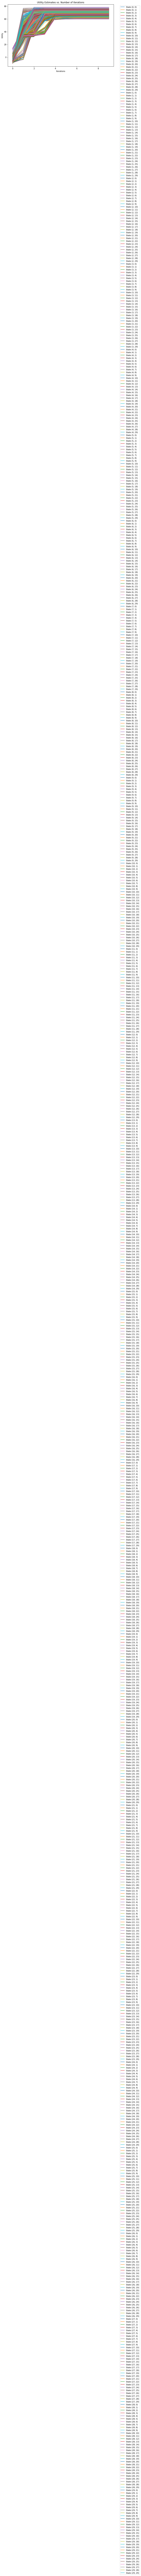

Number of iterations before convergence: 10

Optimal Policy:
[['down' 'down' 'down' 'left' 'left' 'righ' 'righ' 'righ' 'righ' 'righ'
  'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ'
  'righ' 'righ' 'righ' 'righ' 'up' 'left' 'left' 'left' 'left' 'left']
 ['down' 'down' 'left' 'left' 'left' 'righ' 'righ' 'righ' 'righ' 'righ'
  'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ'
  'righ' 'righ' 'righ' 'up' 'up' 'left' 'left' 'left' 'left' 'left']
 ['righ' 'down' 'left' 'left' 'down' 'down' 'righ' 'righ' 'righ' 'righ'
  'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ'
  'righ' 'righ' 'up' 'up' 'up' 'up' 'left' 'left' 'left' 'left']
 ['down' 'down' 'down' 'down' 'down' 'down' 'down' 'righ' 'righ' 'righ'
  'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'up'
  'up' 'up' 'up' 'up' 'up' 'up' 'left' 'left' 'left' 'left']
 ['down' 'down' 'down' 'down' 'left' 'down' 'down' 'down' 'righ' 'righ'
  'righ' 'up' 'righ' 'righ'

In [15]:

# Calculate expected utility of performing an action from a state
def expected_utility(action, x, y, utilities):
    if action == 'up':
        forward = (x - 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'down':
        forward = (x + 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'left':
        forward = (x, y - 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)
    elif action == 'right':
        forward = (x, y + 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)

    
    utility_sum = 0
    for nx, ny in [forward, side1, side2]:
        if is_valid_state(nx, ny):
            p = prob_forward if (nx, ny) == forward else prob_side
            utility_sum += p * utilities[nx, ny]
        else:
            utility_sum += (prob_forward if (nx, ny) == forward else prob_side) * utilities[x, y]
    return utility_sum

initial_policy = np.random.choice(actions, size=grid_size)


# Correct the policy_evaluation function to pass the utilities array
def policy_evaluation(policy, utilities):
    while True:
        delta = 0
        new_utilities = utilities.copy()
        for x in range(grid_size[0]):
            for y in range(grid_size[1]):
                if not is_valid_state(x, y):
                    continue
                utility = rewards[x, y] + gamma * expected_utility(policy[x, y], x, y, utilities)
                delta = max(delta, abs(utility - utilities[x, y]))
                new_utilities[x, y] = utility
        if delta < 0.01*(1-gamma)/gamma:
            break
        utilities = new_utilities
    return utilities

# Correct the policy_improvement function to pass the utilities array
def policy_improvement(utilities, policy):
    policy_stable = True
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if not is_valid_state(x, y):
                continue
            old_action = policy[x, y]
            max_utility = -np.inf
            for action in actions:
                utility = rewards[x, y] + gamma * expected_utility(action, x, y, utilities)
                if utility > max_utility:
                    max_utility = utility
                    policy[x, y] = action
            if old_action != policy[x, y]:
                policy_stable = False
    return policy, policy_stable

# Run the policy iteration code with the corrected functions
utilities = np.zeros(grid_size)
policy = initial_policy.copy()
utilities_history = []  # Track utilities for plotting
iteration = 0

while True:
    utilities = policy_evaluation(policy, utilities)
    utilities_history.append(utilities.copy())
    policy, policy_stable = policy_improvement(utilities, policy)
    iteration += 1
    if policy_stable:
        break

# Create readable policy and utilities output
policy_readable = np.full(grid_size, 'Wall')
utilities_readable = np.full(grid_size, 'Wall', dtype='<U10')
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if is_valid_state(x, y):
            policy_readable[x, y] = policy[x, y]
            utilities_readable[x, y] = f"{utilities[x, y]:.2f}"

# Plotting utilities as a function of iterations
plt.figure(figsize=(10, 6))
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if is_valid_state(x, y):
            utilities_xy = [utilities_history[i][x, y] for i in range(len(utilities_history))]
            plt.plot(utilities_xy, label=f'State ({x}, {y})')

plt.xlabel('Iterations')
plt.ylabel('Utility')
plt.title('Utility Estimates vs. Number of Iterations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display results
print("Number of iterations before convergence:", iteration)
print()
print("Optimal Policy:")
print(policy_readable)
print()
print("Utilities of states:")
print(utilities_readable)

500X500 maze

In [ ]:
# Example usage for a 500x500 maze
grid_size = (500, 500)
rewards, utilities, policy = initialize_random_maze(grid_size)

In [6]:
prob_forward = 0.8
prob_side = 0.1
actions = ['up', 'down', 'left', 'right']
# Discount factor remains the same
gamma = 0.99

def is_valid_state(x, y):
    return (0 <= x < grid_size[0]) and (0 <= y < grid_size[1])


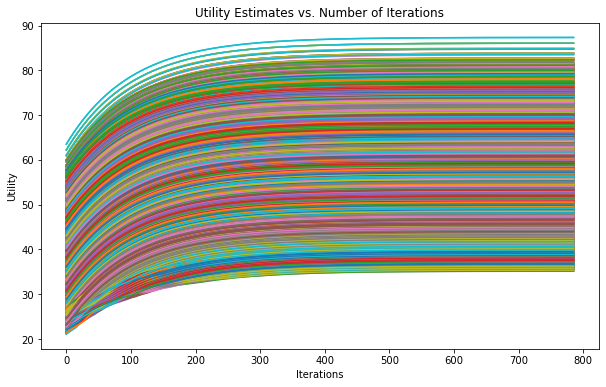

Number of iterations before it converges: 786

Optimal Policy:
[['down' 'down' 'down' ... 'down' 'down' 'down']
 ['down' 'down' 'down' ... 'down' 'down' 'down']
 ['down' 'down' 'down' ... 'down' 'down' 'down']
 ...
 ['righ' 'righ' 'righ' ... 'left' 'left' 'left']
 ['righ' 'righ' 'righ' ... 'left' 'left' 'left']
 ['righ' 'righ' 'righ' ... 'left' 'left' 'left']]

Utilities of states:
[['64.44' '64.17' '63.83' ... '66.83' '66.85' '67.10']
 ['65.33' '65.04' '64.66' ... '67.82' '67.71' '68.03']
 ['66.25' '65.92' '65.51' ... '68.85' '68.56' '68.98']
 ...
 ['61.40' '62.29' '63.22' ... '70.14' '69.21' '68.29']
 ['61.41' '62.23' '63.06' ... '70.92' '69.98' '69.04']
 ['61.43' '62.26' '63.10' ... '71.72' '70.69' '69.68']]


In [8]:
# using same value iteration code as done in part 1


# Calculate expected utility of performing an action from a state
def expected_utility(action, x, y):
    if action == 'up':
        forward = (x - 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'down':
        forward = (x + 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'left':
        forward = (x, y - 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)
    elif action == 'right':
        forward = (x, y + 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)

    utility_sum = 0
    for nx, ny in [forward, side1, side2]:
        if is_valid_state(nx, ny):
            p = prob_forward if (nx, ny) == forward else prob_side
            utility_sum += p * utilities[nx, ny]
        else:
            utility_sum += (prob_forward if (nx, ny) == forward else prob_side) * utilities[x, y]
    return utility_sum

# value iteration

iteration = 0
utilities_history = []  # Track utilities for plotting
while True:
    delta = 0
    new_utilities = np.copy(utilities)
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if is_valid_state(x, y):
                max_utility = -np.inf
                for action in actions:
                    utility = rewards[x, y] + gamma * expected_utility(action, x, y)
                    if utility > max_utility:
                        max_utility = utility
                        policy[x, y] = action
                delta = max(delta, abs(max_utility - utilities[x, y]))
                new_utilities[x, y] = max_utility
    utilities = new_utilities
    utilities_history.append(utilities.copy())
    iteration += 1
    if delta < 0.01 * (1 - gamma) / gamma:  # Convergence criterion
        break

# Plotting utilities as a function of iterations
plt.figure(figsize=(10, 6))
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if is_valid_state(x, y):
            utilities_xy = [utilities_history[i][x, y] for i in range(len(utilities_history))]
            plt.plot(utilities_xy, label=f'State ({x}, {y})')

plt.xlabel('Iterations')
plt.ylabel('Utility')
plt.title('Utility Estimates vs. Number of Iterations')
plt.show()

# Define the policy_readable and utilities_readable (unchanged)
policy_readable = np.full(grid_size, 'Wall')
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        
        if is_valid_state(x, y):
            policy_readable[x, y] = policy[x, y]
        else:
            policy_readable[x, y] = 'Wall'

policy_readable

utilities_readable = np.full(grid_size, ' ', dtype='<U10')

# Populate the utilities_readable with the values from the utilities array
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        
        if is_valid_state(x, y):
            utilities_readable[x, y] = f"{utilities[x, y]:.2f}"
        
        else:
            utilities_readable[x, y] = 'Wall'
      
# Display results
print("Number of iterations before it converges:", iteration)
print()
print("Optimal Policy:")
print(policy_readable)
print()
print("Utilities of states:")
print(utilities_readable)

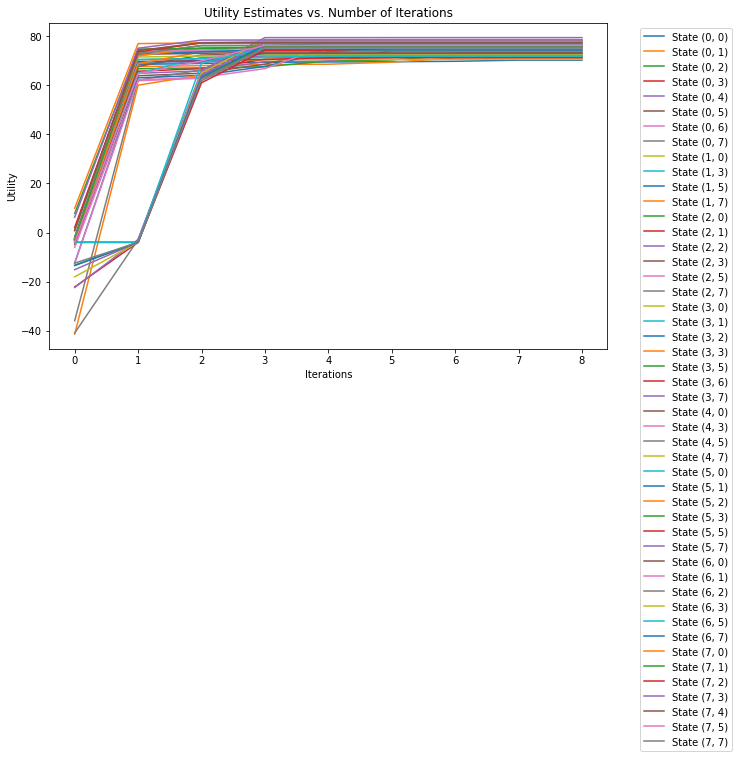

Number of iterations before convergence: 9

Optimal Policy:
[['righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ' 'righ']
 ['down' 'Wall' 'Wall' 'up' 'Wall' 'down' 'Wall' 'down']
 ['down' 'righ' 'righ' 'down' 'Wall' 'down' 'Wall' 'down']
 ['down' 'righ' 'righ' 'down' 'Wall' 'righ' 'righ' 'righ']
 ['down' 'Wall' 'Wall' 'down' 'Wall' 'up' 'Wall' 'up']
 ['down' 'righ' 'righ' 'down' 'Wall' 'up' 'Wall' 'up']
 ['down' 'righ' 'righ' 'down' 'Wall' 'down' 'Wall' 'up']
 ['down' 'left' 'righ' 'down' 'left' 'left' 'Wall' 'up']]

Utilities of states:
[['70.22' '71.12' '72.06' '73.02' '74.12' '75.10' '76.11' '78.33']
 ['70.53' 'Wall' 'Wall' '72.06' 'Wall' '75.08' 'Wall' '76.14']
 ['71.47' '71.23' '72.09' '72.95' 'Wall' '76.08' 'Wall' '78.36']
 ['72.45' '71.90' '72.95' '74.02' 'Wall' '77.09' '78.36' '79.40']
 ['73.49' 'Wall' 'Wall' '75.14' 'Wall' '76.08' 'Wall' '78.36']
 ['74.47' '74.38' '75.27' '76.14' 'Wall' '75.08' 'Wall' '77.34']
 ['75.47' '75.19' '76.25' '77.27' 'Wall' '75.25' 'Wall' '76.32']
 ['77

In [ ]:

# Calculate expected utility of performing an action from a state
def expected_utility(action, x, y, utilities):
    if action == 'up':
        forward = (x - 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'down':
        forward = (x + 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'left':
        forward = (x, y - 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)
    elif action == 'right':
        forward = (x, y + 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)

    
    utility_sum = 0
    for nx, ny in [forward, side1, side2]:
        if is_valid_state(nx, ny):
            p = prob_forward if (nx, ny) == forward else prob_side
            utility_sum += p * utilities[nx, ny]
        else:
            utility_sum += (prob_forward if (nx, ny) == forward else prob_side) * utilities[x, y]
    return utility_sum

initial_policy = np.random.choice(actions, size=grid_size)
for wall in walls:
    initial_policy[wall] = None  # No policy for wall states


# Correct the policy_evaluation function to pass the utilities array
def policy_evaluation(policy, utilities):
    while True:
        delta = 0
        new_utilities = utilities.copy()
        for x in range(grid_size[0]):
            for y in range(grid_size[1]):
                if not is_valid_state(x, y):
                    continue
                utility = rewards[x, y] + gamma * expected_utility(policy[x, y], x, y, utilities)
                delta = max(delta, abs(utility - utilities[x, y]))
                new_utilities[x, y] = utility
        if delta < 0.01*(1-gamma)/gamma:
            break
        utilities = new_utilities
    return utilities

# Correct the policy_improvement function to pass the utilities array
def policy_improvement(utilities, policy):
    policy_stable = True
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if not is_valid_state(x, y):
                continue
            old_action = policy[x, y]
            max_utility = -np.inf
            for action in actions:
                utility = rewards[x, y] + gamma * expected_utility(action, x, y, utilities)
                if utility > max_utility:
                    max_utility = utility
                    policy[x, y] = action
            if old_action != policy[x, y]:
                policy_stable = False
    return policy, policy_stable

# Run the policy iteration code with the corrected functions
utilities = np.zeros(grid_size)
policy = initial_policy.copy()
utilities_history = []  # Track utilities for plotting
iteration = 0

while True:
    utilities = policy_evaluation(policy, utilities)
    utilities_history.append(utilities.copy())
    policy, policy_stable = policy_improvement(utilities, policy)
    iteration += 1
    if policy_stable:
        break

# Create readable policy and utilities output
policy_readable = np.full(grid_size, 'Wall')
utilities_readable = np.full(grid_size, 'Wall', dtype='<U10')
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if is_valid_state(x, y):
            policy_readable[x, y] = policy[x, y]
            utilities_readable[x, y] = f"{utilities[x, y]:.2f}"

# Plotting utilities as a function of iterations
plt.figure(figsize=(10, 6))
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if is_valid_state(x, y):
            utilities_xy = [utilities_history[i][x, y] for i in range(len(utilities_history))]
            plt.plot(utilities_xy, label=f'State ({x}, {y})')

plt.xlabel('Iterations')
plt.ylabel('Utility')
plt.title('Utility Estimates vs. Number of Iterations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display results
print("Number of iterations before convergence:", iteration)
print()
print("Optimal Policy:")
print(policy_readable)
print()
print("Utilities of states:")
print(utilities_readable)